
**Student Name**: [Aditya Chakravarthy]

**Date**: [05/22/22]




Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

tripdata_df = pd.read_csv("https://nyc-tlc.s3.amazonaws.com/csv_backup/green_tripdata_2019-12.csv")

/var/folders/nz/dg416w7d0f93zbgdp0t1rts00000gn/T/ipykernel_44490/4170364566.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  tripdata_df = pd.read_csv("https://nyc-tlc.s3.amazonaws.com/csv_backup/green_tripdata_2019-12.csv")


###  previous data preparation steps, EDA and visualizations.

In [2]:
tripdata_df = tripdata_df[tripdata_df.isnull().sum(axis=1) < 6] #delete all rows with 6 or more missing variables in 
# each row
print(tripdata_df.info())
del tripdata_df["ehail_fee"] #delete ehail_fee column because it has no values or data
print(tripdata_df.isnull().sum())
print(tripdata_df["improvement_surcharge"].value_counts(dropna = False)) #shows that 0.30 is the most common value
tripdata_df[tripdata_df["improvement_surcharge"].isna()] = float(0.30) #replace NaN with 0.30
print(tripdata_df[tripdata_df["improvement_surcharge"].isna()]) #Shows no more NaN values
print(tripdata_df.isnull().sum()) #shows that are no more null and empty values in entire dataframe

#The following code fixes the data types
tripdata_df["VendorID"] = tripdata_df["VendorID"].astype("string")
tripdata_df["RatecodeID"] = tripdata_df["RatecodeID"].astype("int")
tripdata_df["PULocationID"] = tripdata_df["PULocationID"].astype("int")
tripdata_df["DOLocationID"] = tripdata_df["DOLocationID"].astype("int")
tripdata_df["store_and_fwd_flag"] = tripdata_df["store_and_fwd_flag"].astype("string")
tripdata_df["passenger_count"] = tripdata_df["passenger_count"].astype("int")
tripdata_df["payment_type"] = tripdata_df["payment_type"].astype("int")
tripdata_df["trip_type"] = tripdata_df["trip_type"].astype("int")


tripdata_df = tripdata_df[tripdata_df["trip_distance"] > 0] #Deletes rows where trip distance is negative. 
tripdata_df = tripdata_df[tripdata_df["fare_amount"] > 0] #Deletes rows where fair amount is negative. We now have 
# around 347,000 entrie
tripdata_df = tripdata_df[tripdata_df["trip_type"] > 0] #Deletes rows where trip type was 0. This data is invalid and 
# should be removed because trips can only be one or two. 
tripdata_df = tripdata_df[tripdata_df["improvement_surcharge"] > 0] #Deletes rows where surcharge was negative. This data is invalid. 
#tripdata_df[tripdata_df["trip_type"].isna()] = "1" #Use imputation to change NaN values to 1 since that is over 90% of the data


tripdata_df.drop_duplicates(inplace = True)

print(tripdata_df.info()) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359902 entries, 0 to 359901
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               359902 non-null  float64
 1   lpep_pickup_datetime   359902 non-null  object 
 2   lpep_dropoff_datetime  359902 non-null  object 
 3   store_and_fwd_flag     359902 non-null  object 
 4   RatecodeID             359902 non-null  float64
 5   PULocationID           359902 non-null  int64  
 6   DOLocationID           359902 non-null  int64  
 7   passenger_count        359902 non-null  float64
 8   trip_distance          359902 non-null  float64
 9   fare_amount            359902 non-null  float64
 10  extra                  359902 non-null  float64
 11  mta_tax                359902 non-null  float64
 12  tip_amount             359902 non-null  float64
 13  tolls_amount           359902 non-null  float64
 14  ehail_fee              0 non-null   

### Visualizations

In [ ]:
top_five = tripdata_df["DOLocationID"].value_counts().head(5)
print(top_five.plot(kind = "bar"))

In [ ]:
top_two = tripdata_df["trip_type"].value_counts().head(3)
print(top_two.plot(kind = "bar"))


The first bar graph shows that the most popular drop off location is is the location ID 74 with over 15,000 trips 
having this location has its destination. The DOLocationID 42 and 41 also had a lot of people dropping off at this 
location as both had over 13,000 drop offs. 
The most common way New Yorkers request cabs is through street-hail. This is what the number one represents according
to the dictionary. This won by an overwhelming majority as under 10,000 call a taxi through 2 (Dispatch). However,
over 330,000 people called a taxi through street-hail.

In [ ]:
X   = tripdata_df[['fare_amount', 'total_amount', 'extra', 'trip_type', 'payment_type']] #get the input features
y   = tripdata_df['tip_amount']              #get the target

I chose the fare amount and total amount feature because it is common for people to tip as a percentage of the bill. So usually if the bill is a higher than the tip is also larger. I also chose the payment type as a feature because someone might tip less if the payment type is cash (if they don't have suffucient funds). Extra fees are another variable that contribute to the total bill and could affect the tip. If the individual is hit with a lot of extra fees they would be less inclined to leave a tip. The trip type might also affect the tip. People who street-hail are more in a hurry and might be inclined to tip more due to the spontenous event. 

### Model to Predict Tip Amount

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

In [38]:
rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('The predicted tip amount is: {}'.format(y_pred))

The predicted tip amount is: [0.   1.24 3.16 ... 0.   0.   0.  ]


In [39]:
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))
# we dont want to overfit the data. 0-5. 


The mse of the model is: 0.5352375650054331


#### Results and Predictions of Model

I believe the model produced some relatively accurage predictions. This is evident through the mean squred error which was only 0.53. This is a relatively low number which illustrates that our model does a good job of predicting the tip amount. It's also important to notice the mse isn't too small. 

### Try at least three different values for the n_estimators parameter 

In [33]:
rf = RandomForestRegressor(random_state=7, n_estimators = 150)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse_150 = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse_150))

The mse of the model is: 0.549743365244597


In [34]:
rf = RandomForestRegressor(random_state=7, n_estimators = 200)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse_200 = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse_200))

The mse of the model is: 0.5622190517686916


In [35]:
rf = RandomForestRegressor(random_state=7, n_estimators = 50)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse_50 = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse_50))

The mse of the model is: 0.4919259935612159


In [37]:
rf = RandomForestRegressor(random_state=7, n_estimators = 25)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse_25 = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse_25))

The mse of the model is: 0.5033012949195065


The default value for n_estimators is 100. Therefor, I experimented with values both above and below this benchmark and found that the lower numbered estimators produced more accurate results. Because the results are more accurate I would feel more confident in the model that uses 25 as the n-estimator. It is accurate and does a good job of predicting the tip amount. However it is important not to go too low as this will increase the mse once again. An n-estimator = 10 yields a 0.61 mse. 


### The Random forest has a method that returns the importance of each feature in the model. Exploring which selected features were the most important when making the predictions. Visualizing the feature importance.

In [50]:
rf.feature_importances_

array([0.20439575, 0.52404493, 0.01601245, 0.00151537, 0.2540315 ])

<BarContainer object of 5 artists>

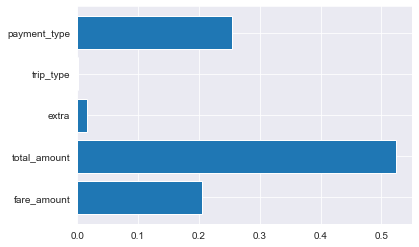

In [52]:
plt.barh(['fare_amount', 'total_amount', 'extra', 'trip_type', 'payment_type'], rf.feature_importances_)     

According to the above graph, the total_amount, payment_type, and fare_amount are the most important features when making predictions. 

array([ True,  True, False, False,  True])